In [1]:
# 라이브러리 임포트 및 기본 설정
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'   # Windows
plt.rcParams['axes.unicode_minus'] = False      # 마이너스 기호 깨짐 방지
plt.rcParams['figure.dpi'] = 100                # 그래프 해상도

In [2]:
import pandas as pd

# 함수 정의
def load_weather_csv(file_path):
    start_row = None
    with open(file_path, encoding='cp949') as f:
        for i, line in enumerate(f):
            if '지점번호' in line:
                start_row = i
                break
    
    df = pd.read_csv(file_path, encoding='cp949', skiprows=start_row, engine='python')
    df.columns = df.columns.str.strip().str.replace('"', '')
    df['일시'] = pd.to_datetime(df['일시'].astype(str).str.strip())
    df = df.dropna(subset=['일시']).sort_values('일시').reset_index(drop=True)
    
    return df

# 파일 로드
weather_67 = load_weather_csv('busan_weather_6~7.csv')
weather_45 = load_weather_csv('busan_weather_4~5.csv')

print("\n장마철 강수량:")
print(weather_67.head())

print("\n비장마철 강수량:")
print(weather_45.head())


장마철 강수량:
   지점번호 지점명         일시  강수량(mm)  일최다강수량(mm)    일최다강수량일자  1시간최다강수량(mm)  \
0   159  부산 2020-06-01    321.1        99.2  2020-06-29          33.2   
1   159  부산 2020-07-01    796.8       208.7  2020-07-10          81.6   
2   159  부산 2021-06-01    232.3        82.6  2021-06-11          12.8   
3   159  부산 2021-07-01    399.9       137.5  2021-07-07          45.5   
4   159  부산 2022-06-01    152.0        49.8  2022-06-05          15.2   

   1시간최다강수량일자  Unnamed: 8  
0  2020-06-13         NaN  
1  2020-07-23         NaN  
2  2021-06-11         NaN  
3  2021-07-07         NaN  
4  2022-06-29         NaN  

비장마철 강수량:
   지점번호 지점명         일시  강수량(mm)  일최다강수량(mm)    일최다강수량일자  1시간최다강수량(mm)  \
0   159  부산 2020-04-01     83.5        33.2  2020-04-19           8.0   
1   159  부산 2020-05-01     96.2        50.8  2020-05-09          12.1   
2   159  부산 2021-04-01    107.1        39.5  2021-04-03          14.3   
3   159  부산 2021-05-01    139.2        45.1  2021-05-16          17.4   
4   159

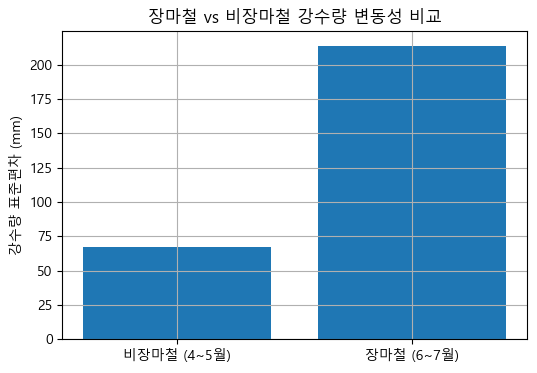

In [3]:
import matplotlib.pyplot as plt

# 1️⃣ 표준편차 계산
std_45 = weather_45['강수량(mm)'].std()
std_67 = weather_67['강수량(mm)'].std()

# 2️⃣ 막대그래프
plt.figure(figsize=(6, 4))

plt.bar(
    ['비장마철 (4~5월)', '장마철 (6~7월)'],
    [std_45, std_67]
)

plt.title('장마철 vs 비장마철 강수량 변동성 비교')
plt.ylabel('강수량 표준편차 (mm)')
plt.grid(True)

plt.show()


In [4]:
def load_solar_csv(file_path):
    import pandas as pd

    # 1️⃣ 실제 헤더 줄 찾기 (지점번호 기준)
    start_row = None
    with open(file_path, encoding='cp949') as f:
        for i, line in enumerate(f):
            if '지점번호' in line:
                start_row = i
                break

    # 2️⃣ CSV 읽기
    df = pd.read_csv(
        file_path,
        encoding='cp949',
        skiprows=start_row,
        engine='python'
    )

    # 3️⃣ 컬럼 정리 (필수)
    df.columns = df.columns.str.strip()

    # 4️⃣ 문자열 값 정리 (탭, 공백 제거)
    df = df.applymap(
        lambda x: x.strip() if isinstance(x, str) else x
    )

    # 5️⃣ 날짜 변환 (Jun-20 형태 → datetime)
    df['일시'] = pd.to_datetime(
        df['일시'],
        format='%b-%y',
        errors='coerce'
    )

    # 6️⃣ 날짜 없는 행 제거 + 정렬
    df = (
        df.dropna(subset=['일시'])
          .sort_values('일시')
          .reset_index(drop=True)
    )

    return df
solar_67 = load_solar_csv('busan_solar_data_6~7.csv')
solar_45 = load_solar_csv('busan_solar_data_4~5.csv')
print(solar_67.head())
print(solar_45.head())
print(solar_67['일시'].dtype)
print("NaT 개수:", solar_67['일시'].isna().sum())
print("행 개수:", len(solar_67))


  지점번호 지점명         일시  일조합(hr)  일조율(%)  일사합(MJ/m2)
0  159  부산 2020-06-01    231.2   53.24      660.40
1  159  부산 2020-07-01     86.9   19.66      393.46
2  159  부산 2021-06-01    208.0   47.89      630.93
3  159  부산 2021-07-01    193.8   43.84      603.76
4  159  부산 2022-06-01    174.2   40.11      554.45
  지점번호 지점명         일시  일조합(hr)  일조율(%)  일사합(MJ/m2)
0  159  부산 2020-04-01    262.4   66.75      649.75
1  159  부산 2020-05-01    215.1   49.48      645.68
2  159  부산 2021-04-01    242.8   61.83      646.07
3  159  부산 2021-05-01    190.8   43.90      585.96
4  159  부산 2022-04-01    233.6   59.55      611.32
datetime64[ns]
NaT 개수: 0
행 개수: 12


C:\Users\jjwan\AppData\Local\Temp\ipykernel_21792\3294780953.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(
C:\Users\jjwan\AppData\Local\Temp\ipykernel_21792\3294780953.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(


In [5]:
# MJ/m² → kWh/m² 변환
# 일사량 변환: MJ/m² × 0.2778 = kWh/m²
solar_67['일사량(kWh/m²)'] = solar_67['일사합(MJ/m2)'] * 0.2778
solar_45['일사량(kWh/m²)'] = solar_45['일사합(MJ/m2)'] * 0.2778

# 발전량 계산 (패널 20m², 효율 18%, 손실 20%)
solar_67['발전량(kWh)'] = solar_67['일사량(kWh/m²)'] * 20 * 0.18 * 0.8
solar_45['발전량(kWh)'] = solar_45['일사량(kWh/m²)'] * 20 * 0.18 * 0.8

# 전체 컬럼 확인
print("장마철:")
print(solar_67)

print("\n비장마철:")
print(solar_45)

장마철:
   지점번호 지점명         일시  일조합(hr)  일조율(%)  일사합(MJ/m2)  일사량(kWh/m²)    발전량(kWh)
0   159  부산 2020-06-01    231.2   53.24      660.40   183.459120  528.362266
1   159  부산 2020-07-01     86.9   19.66      393.46   109.303188  314.793181
2   159  부산 2021-06-01    208.0   47.89      630.93   175.272354  504.784380
3   159  부산 2021-07-01    193.8   43.84      603.76   167.724528  483.046641
4   159  부산 2022-06-01    174.2   40.11      554.45   154.026210  443.595485
5   159  부산 2022-07-01    193.8   43.84      622.11   172.822158  497.727815
6   159  부산 2023-06-01    199.7   45.99      618.05   171.694290  494.479555
7   159  부산 2023-07-01    143.5   32.44      513.02   142.516956  410.448833
8   159  부산 2024-06-01    192.3   44.28      594.02   165.018756  475.254017
9   159  부산 2024-07-01    163.0   36.87      546.79   151.898262  437.466995
10  159  부산 2025-06-01    186.8   44.50      589.51   163.765878  471.645729
11  159  부산 2025-07-01    287.2   64.96      753.71   209.380638  603.0

In [6]:
# 장마철
merged_67 = pd.merge(
    weather_67[['일시', '강수량(mm)']],
    solar_67[['일시', '일사량(kWh/m²)', '발전량(kWh)', '일조합(hr)']],
    on='일시'
)

# 비장마철
merged_45 = pd.merge(
    weather_45[['일시', '강수량(mm)']],
    solar_45[['일시', '일사량(kWh/m²)', '발전량(kWh)', '일조합(hr)']],
    on='일시' # 같은 날짜끼리 붙이기
)

# 발전량 비교

print("="*30)
print("발전량 분석")
print("="*30)

avg_power_67 = merged_67['발전량(kWh)'].mean()
avg_power_45 = merged_45['발전량(kWh)'].mean()
power_loss = avg_power_45 - avg_power_67
loss_percent = (power_loss / avg_power_45) * 100

print(f"\n비장마철 평균 발전량: {avg_power_45:.0f} kWh")
print(f"장마철 평균 발전량: {avg_power_67:.0f} kWh")
print(f"→ 장마철 감소: {power_loss:.0f} kWh ({loss_percent:.1f}% 감소)")


발전량 분석

비장마철 평균 발전량: 509 kWh
장마철 평균 발전량: 472 kWh
→ 장마철 감소: 37 kWh (7.2% 감소)


In [7]:
print("\n" + "="*30)
print("상관관계 분석")
print("="*30 + "\n")

# 장마철 상관관계
corr_67 = merged_67[['강수량(mm)', '발전량(kWh)']].corr().iloc[0, 1]
z_67 = np.polyfit(merged_67['강수량(mm)'], merged_67['발전량(kWh)'], 1)

# 비장마철 상관관계
corr_45 = merged_45[['강수량(mm)', '발전량(kWh)']].corr().iloc[0, 1]
z_45 = np.polyfit(merged_45['강수량(mm)'], merged_45['발전량(kWh)'], 1)

print(f"장마철 상관계수: {corr_67:.3f}")
print(f"  → 강수량 100mm ↑ → 발전량 {abs(z_67[0]*100):.0f}kWh ↓")
print(f"\n비장마철 상관계수: {corr_45:.3f}")
print(f"  → 강수량 100mm ↑ → 발전량 {abs(z_45[0]*100):.0f}kWh ↓")


상관관계 분석

장마철 상관계수: -0.710
  → 강수량 100mm ↑ → 발전량 23kWh ↓

비장마철 상관계수: -0.622
  → 강수량 100mm ↑ → 발전량 55kWh ↓


In [8]:
print("\n" + "="*30)
print("ESS 필요 용량 (일반 가정 기준)")
print("="*30 + "\n")

PANEL_AREA = 20  # m²
MONTHLY_NEED = 400 # 4인 가족 평균 한 달 동안 필요한 전기량 = 400kWh
worst = merged_67.loc[merged_67['발전량(kWh)'].idxmin()] # 장마철 중에서 발전량이 가장 적었던 달
shortage = max(0, MONTHLY_NEED - worst['발전량(kWh)']) # 필요한 전기 - 만든 전기 = 부족한 전기
                                                       # max(0,...) -> max(0, -100) = 0 음수 대신 0출력, 부족하지 않으면 0으로
recommended = shortage * 1.2    # 부족량에 20% 여유분 추가
commercial = int(np.ceil(recommended / 10)) * 10 # 상용 제품 단위로 올림 (실제 제품: 10kWh, 20kWh, 30kWh...단위로 판매)

print(f"\n패널 면적: {PANEL_AREA}m² (약 15개)")
print(f"월 필요량: {MONTHLY_NEED} kWh (4인 가족)")
print(f"평균 발전량: {merged_67['발전량(kWh)'].mean():.0f} kWh")
print(f"최악 발전량: {worst['발전량(kWh)']:.0f} kWh ({worst['일시'].strftime('%Y년 %m월')})")
print(f"부족량: {shortage:.0f} kWh")
print(f"권장 ESS: {commercial} kWh")
print(f"예상 비용: 약 {commercial * 500000:,}원") # 용량 * 단가 = 총 비용
                                                 # 50만원은 ESS 배터리 시장 평균 단가


ESS 필요 용량 (일반 가정 기준)


패널 면적: 20m² (약 15개)
월 필요량: 400 kWh (4인 가족)
평균 발전량: 472 kWh
최악 발전량: 315 kWh (2020년 07월)
부족량: 85 kWh
권장 ESS: 110 kWh
예상 비용: 약 55,000,000원


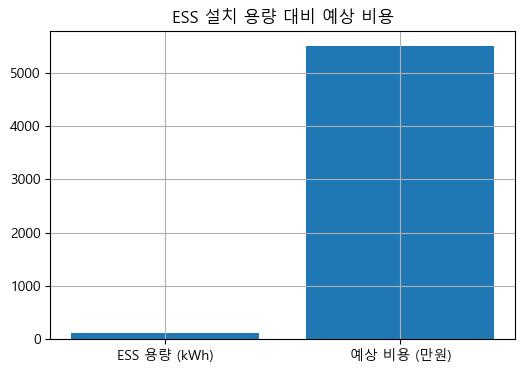

In [9]:
plt.figure(figsize=(6, 4))

plt.bar(
    ['ESS 용량 (kWh)', '예상 비용 (만원)'],
    [commercial, commercial * 50]
)

plt.title('ESS 설치 용량 대비 예상 비용')
plt.grid(True)

plt.show()
